In [1]:
# Import all modules
from common import concatenate_features, extract_features, load_audio
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from time import time

In [2]:
# How to use load_audio() function
wav_files = list(map(lambda f: 'wavs/' + f, os.listdir('wavs/')))
male_voices, female_voices = load_audio(wav_files)

# Use the extract_features() function
male_features = extract_features(male_voices)
female_features = extract_features(female_voices)

# How the function is used
male_concatenated = concatenate_features(male_features)
female_concatenated = concatenate_features(female_features)

print(male_concatenated.shape) 		# Output: (117576, 26)
print(female_concatenated.shape)	# Output: (124755, 26)

100%|██████████| 300/300 [00:00<00:00, 545.70it/s] 

(117667, 26)
(124815, 26)


In [3]:

# Concatenate male voices and female voices
X = np.vstack((male_concatenated, female_concatenated))

# Create labels
y = np.append([0] * len(male_concatenated), [1] * len(female_concatenated))

# Check whether X and y are already having the exact same length
print(X.shape)		# Output: (242268, 26)
print(y.shape)		# Output: (242268,)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

(242482, 26)
(242482,)


In [9]:
# Create deep neural network
dnn = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=3, alpha=0.0001, solver='sgd', verbose=10, random_state=21, tol=0.000000001)

# Train the model
start = time()
dnn.fit(X_train, y_train)
end = time()
print("Training time: ", end - start)

# Compute the accuracy score towards the train data
start = time()
train_score = dnn.score(X_train, y_train)
print("Train accuracy score: ", train_score)
end = time()
print("Scoring time: ", end - start)

# Compute the accuracy score towards the test data
start = time()
test_score = dnn.score(X_test, y_test)
print("Test accuracy score: ", test_score)
end = time()
print("Scoring time: ", end - start)

Iteration 1, loss = 0.58783067
Iteration 2, loss = 0.53356826
Iteration 3, loss = 0.51832409
Training time:  44.01703119277954


/Users/jescudero/Developer/IA/gender_recognition/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


Train accuracy score:  0.7413047400572209
Scoring time:  0.526953935623169
Test accuracy score:  0.7371589995257438
Scoring time:  0.1385960578918457


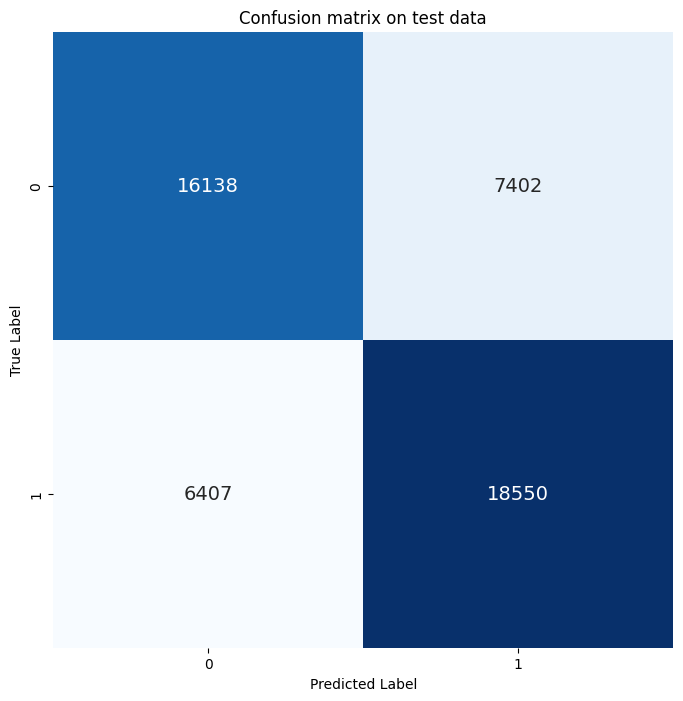

In [5]:
# Predict the first 100000 test data
dnn_predictions = dnn.predict(X_test[:100000])

# Create confusion matrix
cm = confusion_matrix(y_test[:100000], dnn_predictions)

# Create the confusion matrix display
plt.figure(figsize=(8,8))
plt.title('Confusion matrix on test data')
sns.heatmap(cm, annot=True, fmt='d', 
            cmap=plt.cm.Blues, cbar=False, annot_kws={'size':14})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [13]:
import librosa
from pydub import AudioSegment

user_file = input('Enter the path to the audio file: ')

if not os.path.isfile(user_file):
    print('File not found!')
    # exit without killing kernel
    raise SystemExit

# get file format
file_format = user_file.split('.')[-1]
if file_format != 'wav':
    sound = AudioSegment.from_file(user_file, format=file_format)
    sound.export('user_audio.wav', format='wav')
    user_file = 'user_audio.wav'

audio_file = librosa.load(user_file)

pruebas = np.array([list(audio_file)], dtype=object)

prueba_features = extract_features(pruebas)

prediccion = dnn.predict(prueba_features[0])

total = len(prediccion)
hombres = len(prediccion[prediccion == 0])
mujeres = len(prediccion[prediccion == 1])

if hombres > mujeres:
    print('El audio es de un hombre, con un {:.2f}% de confianza'.format(hombres / total * 100))
else:
    print('El audio es de una mujer, con un {:.2f}% de confianza'.format(mujeres / total * 100))

100%|██████████| 1/1 [00:00<00:00, 10.75it/s]

El audio es de una mujer, con un 65.61% de confianza
